In [ ]:
#Imports
import os
import shutil
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Filters out the required excel files (makes a copy)
dataset_dir = "C:\\Users\\shash\OneDrive - TU Eindhoven\\Shashank Prabhu University\\Year 2\\Year 2 Q4\\Data Challenge 2\\Git DC2\\Data\\All Data"  # replace with the path to your dataset folder
filtered_dir = "C:\\Users\\shash\\OneDrive - TU Eindhoven\\Shashank Prabhu University\\Year 2\\Year 2 Q4\\Data Challenge 2\\Git DC2"  # replace with the path to the folder where you want to store the filtered data
if not os.path.exists(filtered_dir):
    os.makedirs(filtered_dir)

for month_folder in os.listdir(dataset_dir):
    if not month_folder.startswith("20"):  # skip any folders that don't start with a date
        continue
    for csv_file in os.listdir(os.path.join(dataset_dir, month_folder)):
        if not csv_file.endswith("-metropolitan-street.csv"):  # skip any files that don't match the desired format
            continue
        source_path = os.path.join(dataset_dir, month_folder, csv_file)
        destination_path = os.path.join(filtered_dir, csv_file)
        shutil.copy(source_path, destination_path)  # copy the matching file to the filtered_data folder


In [2]:

folder_path = "C:\\Users\\shash\\OneDrive - TU Eindhoven\\Shashank Prabhu University\\Year 2\\Year 2 Q4\\Data Challenge 2\\Git DC2\\Cleaned Data\\Street"  # replace with the path to your Excel files folder
df_list = []
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # only read in CSV files
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df_list.append(df)
combined_df = pd.concat(df_list, ignore_index=True)


In [3]:
combined_df_copy = combined_df

In [ ]:
null_counts = combined_df.isnull().sum()
print(null_counts)

In [ ]:
output_path ="C:\\Users\\shash\\OneDrive - TU Eindhoven\\Shashank Prabhu University\\Year 2\\Year 2 Q4\\Data Challenge 2\\Git DC2\\Cleaned Data\\conc.csv"
combined_df.to_csv(output_path, index=False)  # save the combined DataFrame to a new CSV file

In [ ]:

# Load CSV data into a pandas DataFrame
df = combined_df

# Connect to an SQLite database (creates a new database file if it doesn't exist)
conn = sqlite3.connect('C:\\Users\\shash\\OneDrive - TU Eindhoven\\Shashank Prabhu University\\Year 2\\Year 2 Q4\\Data Challenge 2\\Git DC2\\Cleaned Data\\database_conc.db')

# Write DataFrame to an SQL database table
df.to_sql('table_name', conn, if_exists='replace', index=False)

# Close the database connection
conn.close()

In [ ]:

# Load the cleaned data into a dataframe
df = combined_df

# Filter the rows to only include burglaries
burglaries = df[df['Crime type'] == 'Burglary']

# Group the remaining rows by month and calculate the mean longitude and latitude
monthly_means = burglaries.groupby('Month')[['Longitude', 'Latitude']].mean()

# Reset the index to make the 'Month' column a regular column
monthly_means = monthly_means.reset_index()

# Plot the monthly means using seaborn's scatterplot function
sns.scatterplot(data=monthly_means, x='Longitude', y='Latitude')

In [4]:
# Load the cleaned data into a dataframe
df = combined_df

# Convert the 'Month' column to a pandas datetime object
df['Month'] = pd.to_datetime(df['Month'])

# Filter the dataframe to only include rows with 'Burglary' in the 'Crime type' column
burglary_df = df[df['Crime type'] == 'Burglary']

# Create a new dataframe with every month of all years
all_months = pd.DataFrame(pd.date_range(start='2010-12-01', end='2023-01-01', freq='MS'), columns=['Month'])

# Group the 'Burglary' dataframe by month and count the number of rows in each month
monthly_counts = burglary_df.groupby(pd.Grouper(key='Month', freq='MS'))['Crime type'].count()

# Combine the 'all_months' dataframe and the 'monthly_counts' series
combined_df_copy = pd.merge(all_months, pd.DataFrame(monthly_counts), how='left', left_on='Month', right_on='Month')

# Fill any missing values with 0
combined_df_copy.fillna(0, inplace=True)

# Rename the 'Crime type' column to 'Number of Burglaries'
combined_df_copy.rename(columns={'Crime type': 'Number of Burglaries'}, inplace=True)

# Set the 'Month' column as the index
combined_df_copy.set_index('Month', inplace=True)

# Preview the resulting dataframe
print(combined_df_copy.head())


            Number of Burglaries
Month                           
2010-12-01                  7897
2011-01-01                  9023
2011-02-01                  7778
2011-03-01                  8314
2011-04-01                  7598


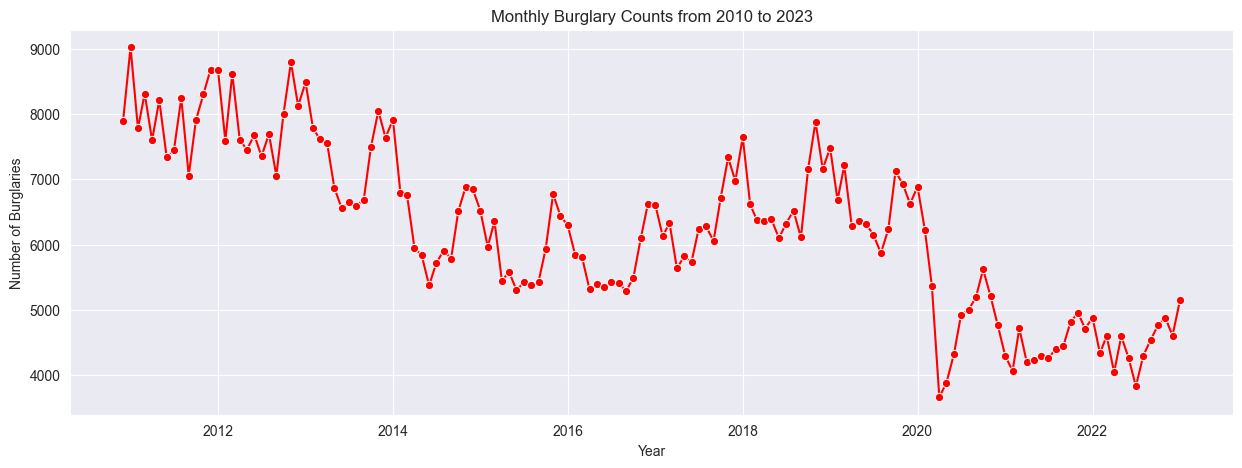

In [5]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 5))
ax = sns.lineplot(data=combined_df_copy, x='Month', y='Number of Burglaries', marker='o', c='r')
# Customize the x-axis ticks to show every year
#plt.xticks(ticks=combined_df_copy.index, labels=combined_df_copy.index.strftime("%Y"), rotation=45, ha="right")

# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Number of Burglaries')
plt.title('Monthly Burglary Counts from 2010 to 2023')

plt.show()

In [14]:
combined_df_copy

,Number of Burglaries
Month,
2010-12-01,7897
2011-01-01,9023
2011-02-01,7778
2011-03-01,8314
2011-04-01,7598
...,...
2022-09-01,4541
2022-10-01,4760
2022-11-01,4880


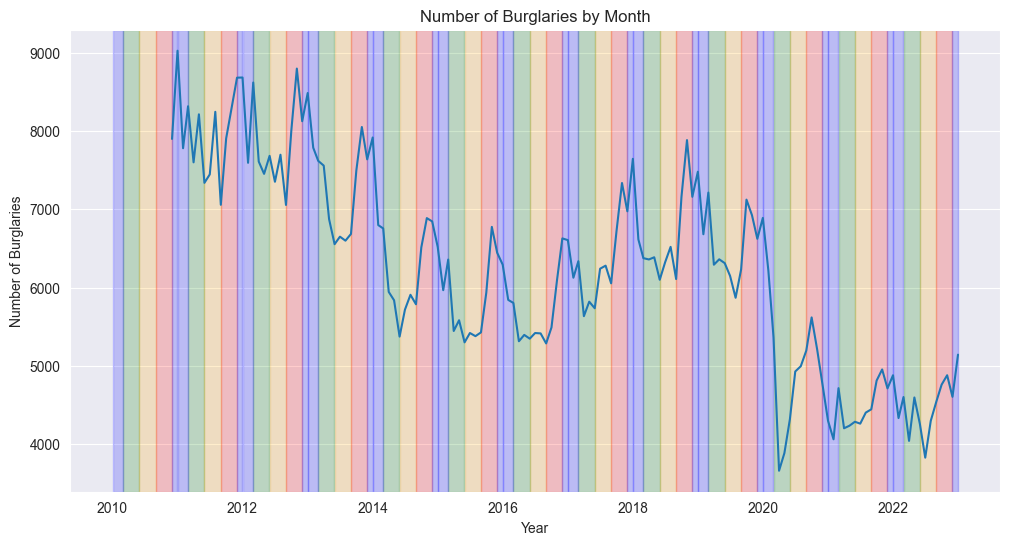

In [41]:

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
sns.lineplot(data=combined_df_copy, x='Month', y='Number of Burglaries', ax=ax)

# Define the seasons and their corresponding colors
seasons = {'Spring': ('03-01', '05-31', 'green'),
           'Summer': ('06-01', '08-31', 'orange'),
           'Fall': ('09-01', '11-30', 'red'), 
           'Winter1': ('12-01', '12-31', 'blue'),
           'Winter2': ('01-01', '02-28', 'blue')}

# Add the seasonal background colors
for year in range(2010, 2023):
    for season, (start, end, color) in seasons.items():
        ax.axvspan(pd.Timestamp(f'{year}-{start}'), pd.Timestamp(f'{year}-{end}'),
                   alpha=0.2, color=color)

# Set the x-axis tick labels to only show the year
#ax.set_xticklabels([x.strftime('%Y') for x in ax.get_xticks()])

# Set the plot title and axis labels
plt.title('Number of Burglaries by Month')
plt.xlabel('Year')
plt.ylabel('Number of Burglaries')

# Show the plot
plt.show()
